In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im = Image.open('..\\resources\\lena.tif')

Se crea una función que para cada pixel, devuelve cero en caso de estar por fuera del rango, o su expansión correspondiente dentro del rango a todo el rango dinámico. Tiene como parámetro el máximo valor de intensidad de cada pixel (por defecto 256)

In [36]:
def enhance_range(R:np.array, range_to_enh:tuple, L=256) -> np.array:
    S = np.zeros(R.shape)
    for i in range(R.size):
        if (R[i] >= L*range_to_enh[0] and R[i] <= L*range_to_enh[1]):
            S[i] = R[i] * (range_to_enh[1] - range_to_enh[0]) / L + range_to_enh[0]
        else:
            S[i] = 0
    return S

Se obtiene la transformación de la imagen original, aplicando la transformación elemento a elemento. El rango de $ 256 \cdot 0.25 $ a $ 256 \cdot 0.5 $ será realzado.

In [42]:
im_data = np.array(list(im.getdata()))
enh_im = enhance_range(im_data, (0.25, 0.5)).reshape(im.size)

Se grafican lado a lado la imagen original y la transformada en la que se realzan los valores entre 0.25 a 0.5

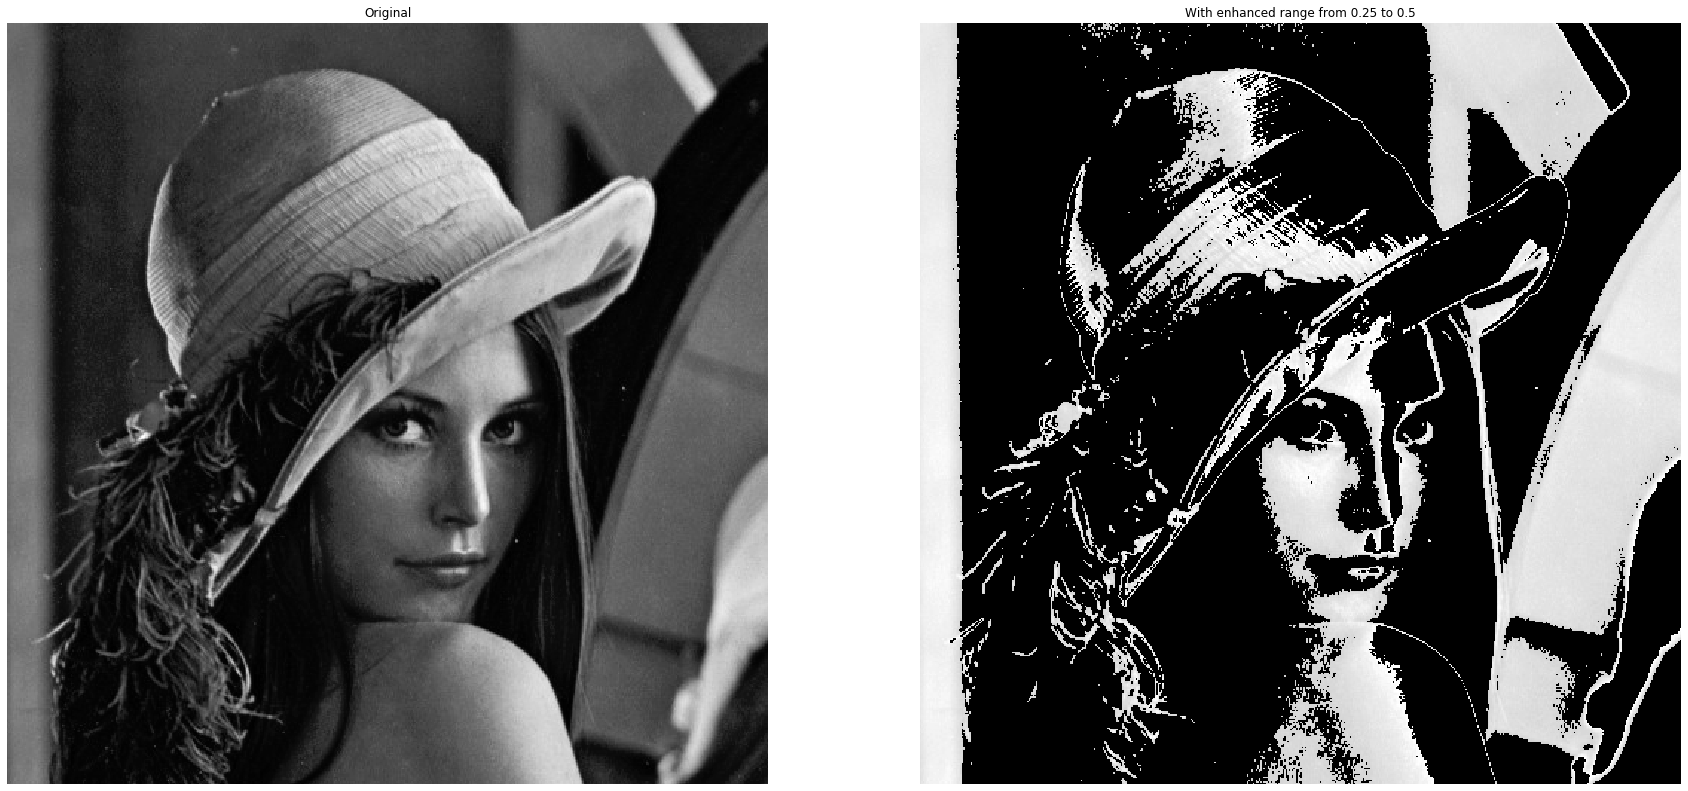

In [43]:
fig = plt.figure()
fig.set_size_inches(30, 15)
rows = 1
cols = 2

fig.add_subplot(rows, cols, 1)
plt.axis('off')
plt.imshow(np.array(list(im.getdata())).reshape(im.size), cmap='gray')
plt.title('Original')

fig.add_subplot(rows, cols, 2)
plt.axis('off')
plt.imshow(enh_im, cmap='gray')
plt.title('With enhanced range from 0.25 to 0.5')

plt.show()